## Chap 10 - One-Sample Tests of Hypothesis

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
sns.set()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

### 10.2

<div class="alert alert-info">
<ul>
<li>**HYPOTHESIS** - In statistical analyiss, a hypotheisis is a statement about a population parameter, subject to verification</li>
</ul>
</div>

### 10.3

<div class="alert alert-info">
<ul>
<li>**HYPOTHESIS TESTING** - A procedure based on sample evidence and probability theory to determine whether the hypothesis is a reasonable statement.</li>
</ul>
</div>

### 10.4

Steps for testing a hypothesis:

<p>1.State the null hypothesis, $H_0$. State the alternate hypothesis, $H_1$.</p>

<div class="alert alert-info">
<ul>
<li>**NULL HYPOTHESIS ($H_0$)** A statement about the value of a population parameter developed for the purpose of testing numerical evidence.</li>
<li>**ALTERNATIVE HYPOTHESIS ($H_1$ or $H_A$)** A statement that is accepted if the sample data provide sufficient evidence that the null hypothesis is rejected.</li>
</ul>
</div>

<p>2. Select a level of significance</p>

<div class="alert alert-info">
<ul>
<li>**LEVEL OF SIGNIFICANCE, $\alpha$** The probability of rejecting the null hypothesis when it is true.</li>
</ul>
</div>
<p>3. Identify the test statistic</p>
<p>4. Formulate a decision rule</p>
<p>5. Collect data, decide to reject $H_0$ based on the decision rule</p>

<div class="alert alert-info">
<ul>
<li>**TYPE I ERROR** - Rejecting the null hypothesis ($H_0$), when it is true.</li>
<li>**TYPE II ERROR** - Not rejecting the null hypothesis ($H_0$), when it is false.</li>
</ul>
</div>

In summary, the following are the possible outcomes of a statistical test:

|Outcome (right) / <br/>Decision (down)| $H_0$ True | $H_0$ False
|---|---|--
|reject $H_0$ |Type I Error|OK
|do not reject $H_0$ |OK|Type II Error

<div class="alert alert-success">
<p>**TESTING A MEAN, $\sigma$ KNOWN**</p>
<p>The test statistic, $z$ is computed by:
$$z = \frac{\bar X - \mu}{\frac{\sigma}{\sqrt n}}$$
where $\bar X$ is the sample mean, $\mu$ is the population mean, $\sigma$ is the population standard deviation and $n$ is the no. of samples.
</p>
</div>

In other words, we find the difference $\bar X - \mu$ and determine if it is statistically significant by calculating how many standard deviations is the size of this difference.

Reject if $z$ is less than the critical value
<div class="alert alert-info">
<ul>
<li>**CRITICAL VALUE** - The point that separates the decision rule of rejecting $H_0$ and not rejecting $H_0$ in favour of $H_1$.</li>
</ul>
</div>

### 10.5

In different business scenarios, a one-tailed test or a two-tailed test is employed. In one-tailed tests, the definition for $H_0$ and $H_1$ are:

\begin{align*}
 \text{H}_0\text{: }\mu \leq \mu_0 \text{ and } \text{H}_\text{1}\text{: } \mu > \mu_0\\
 \text{H}_0\text{: }\mu \geq \mu_0 \text{ and } \text{H}_\text{1}\text{: } \mu < \mu_0
\end{align*}

and for two-tailed tests

\begin{align*}
 \text{H}_0\text{: }\mu = \mu_0 \text{ and } \text{H}_\text{1}\text{: } \mu \neq \mu_0
\end{align*}

Given $\alpha$, it is important to determine the rejection region as they are all different.

### 10.6

#### Self Review 10.1

Given that $X\sim N(\mu=16, \sigma=0.15)$. A sample $n=50$ is taken and $\bar X=16.017$.

a) The null hypothesis $H_0: \mu=16$ and the alternative hypothesis $H_a: \mu \neq 16$

b) It is the given level of significance, $\alpha=0.05$

c) The formula for the test statistic is $z=\frac{\bar X - \mu}{\frac{\sigma}{\sqrt n}}$

d) 

In [2]:
d1 = sp.stats.norm.ppf(0.975)
print(d1)

1.959963984540054


The decision rule is to reject $H_0$ if the calculated $z$-value is in the rejection region: $z>1.96$ or $z<-1.96$

e) 

In [3]:
mu1, sigma1 = 16, 0.15
x_bar1, n1 = 16.017, 50
z1 = (x_bar1-mu1)/(sigma1/n1**0.5)
print(z1)

0.8013876853447285


The value of the test statistic is $0.801$

f) Do not reject the null in favour of the alternate hypothesis

g) We cannot conclude that the sample mean is significantly different from $16$.

$\diamond$

Hypothesis testing is related to confidence intervals. In the example, it is given that $X \sim N(\mu=200, \sigma=16)$. The sample mean for $n=50$ samples is $203.5$. The $z$-value is computed as:

In [4]:
mu_e5, sigma_e5 = 200, 16
n_e5, xbar_e5 = 50, 203.5
z_e5 = sp.stats.norm.ppf(0.995)
calc_ze5 = (xbar_e5-mu_e5)/(sigma_e5/n_e5**0.5)
print(calc_ze5)

1.5467960838455728


and so we don't reject the null with $\alpha=0.01$. Also, take note that for this sample, the confidence interval is:

In [5]:
# X_bar +/- z * sigma/sqrt(n)
intv_5 = z_e5*(sigma_e5/n_e5**0.5)
print([xbar_e5 - intv_5, xbar_e5 + intv_5])

[197.67156362330095, 209.32843637669905]


and $\mu=200$ is in the confidence interval. Hence, we can conclude that the population parameter is in reasonably $200$. Generally, $H_0$ is rejected if the confidence interval does not contain the hypothesized value.

### 10.7

<div class="alert alert-info">
<ul>
<li>**$p$-value** - The probability of observing a sample as extreme as or more extreme than the value observed, given that the null hypothesis is true.</li>
</ul>
</div>

#### Self Review 10.2

a) Now, the null hypothesis $H_0: \mu \leq 16$ and the alternative hypothesis $H_a: \mu > 16$

b)

In [6]:
z2 = sp.stats.norm.ppf(0.95)
print(z2)

1.6448536269514722


With $\alpha=0.05$, the rejection region is $z > 1.645$. 

c) The new $z$-value is

In [7]:
x_bar2 = 16.040
z2 = (x_bar2-mu1)/(sigma1/n1**0.5)
print(z2)

1.8856180831640867


The value of the test statistic is $1.886$

d) Reject the null in favour of the alternative hypothesis

e) The mean amount dispensed is greater than 16.

f) 

In [8]:
sp.stats.norm.sf(z2)

0.029673219395962642

The $p$-value is $0.030$ and so reject the null in favour of the alternative at $\alpha=0.05$. The conclusion is the same.

$\diamond$

### 10.8

<div class="alert alert-success">
<p>**TESTING A MEAN, $\sigma$ UNKNOWN**</p>
<p>The test statistic, now $t$ is computed by:
$$t = \frac{\bar X - \mu}{\frac{s}{\sqrt n}}$$
where $\bar X$ is the sample mean, $\mu$ is the population mean, $s$ is the sample standard deviation and $n$ is the no. of samples.
With $n-1$ degrees of freedom (df)
</p>
</div>

#### Self Review 10.3

Given that $X \sim N(\mu =305)$, a sample $n=20$ is taken and the measurements are $\bar X = 311$ and $s=12$.

a) $H_0: \mu<=305$ and $H_1: \mu>305$

b) Using $\alpha=0.05$

1.729132811521367


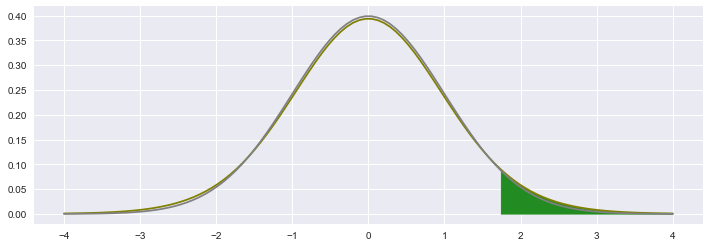

In [9]:
mu3 = 305
n3, x_bar3, s3 = 20, 311, 12
x = np.linspace(-4, 4, 100)
y = sp.stats.t.pdf(x, df=n3-1)
y2 = sp.stats.norm.pdf(x,)
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(x, y, color='olive')
# Just added the normal to compare between normal and t distribution
ax.plot(x, y2, color='grey')
t_095= sp.stats.t.ppf(0.95, df=n3-1)
print(t_095)
# Shaded region is rejection region
ax.fill_between(x, y, where = x>t_095, color='forestgreen')
plt.show()

c)

In [10]:
t = (x_bar3-mu3)/(s3/n3**0.5)
t

2.23606797749979

Reject the null in favour of the alternative. The modification indeed increased the mean life of the battery.

$\diamond$

#### Self Review 10.4

Given that $\mu=9.0$ and the following sample

In [11]:
mu4 = 9.0
X4 = [9.2,8.7,8.9,8.6,8.8,8.5,8.7,9.0]
n4 = len(X4)
print(n4)

8


a) $H_0: \mu >=9.0$, $H_1: \mu < 9.0$

b) df = $n-1=7$

c) 

In [12]:
t_001 = sp.stats.t.ppf(0.01, df=n4-1)
print(t_001)

-2.9979515668685286


Reject if $t<-2.998$

d) 

In [13]:
series4 = pd.Series(X4)
xbar4, s4 = series4.mean(), series4.std()
print([xbar4, s4])
t4= (xbar4-mu4)/(s4/n4**0.5)
print(t4)

[8.8, 0.2267786838055363]
-2.494438257849286


$t=-2.49$ means do not reject the null in favour of the alternate.

In [14]:
p4 = sp.stats.t.cdf(t4, df=n4-1)
print(p4)

0.020663609269207794


$\diamond$

### 10.9

<div class="alert alert-success">
<p>**TEST OF HYPOTHESIS, ONE PROPORTION**</p>
<p>The test statistic, $z$ is computed by:
$$z = \frac{\rho-\pi}{\sqrt {\frac{\pi (1-\pi)}{n}}}$$
where $\pi$ is is the population proportion, $\rho$ is the sample proportion and $n$ is the sample size
</p>
</div>

#### Self Review 10.5

Given that $\pi=40\%$, $\rho = \frac{74}{200}$ and using $\alpha=0.01$

a) The sample size is $200$ and so $z$-value can be used.

b) $H_0: \pi \geq 0.4$, $H_1: \pi < 0.4$

c) 

-2.3263478740408408


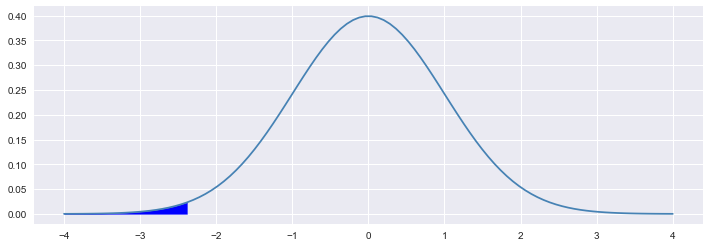

In [15]:
x = np.linspace(-4, 4, 100)
y = sp.stats.norm.pdf(x)
fig, ax = plt.subplots(figsize=(12,4))
# Just added the normal to compare between normal and t distribution
ax.plot(x, y, color='steelblue')
z_099= sp.stats.norm.ppf(0.01)
print(z_099)
# Shaded region is rejection region
ax.fill_between(x, y, where = x<z_099, color='blue')
plt.show()

d) 

In [16]:
rho5, pi5 = 74/200, 0.4
n = 200
z5 = (rho5-pi5)/((pi5 * (1-pi5) / n)**0.5)
print(z5)

-0.8660254037844394


Do not reject the null. The statement that 0.4 is too large cannot be rejected.

e) 

In [17]:
sp.stats.norm.cdf(z5)

0.1932381153856162

There is a 19% chance of observing this sample given that the null is indeed true.

### 10.10

Type II Error is when a researcher fails to reject the null when it is indeed false. (falsely not rejecting the null).

<div class="alert alert-success">
<p>**TYPE II ERROR**</p>
<p>$z$ is computed by:
$$z = \frac{\bar{X_c} - \mu_1}{\frac{\sigma}{\sqrt n}}$$
</p>
</div>

Probability of Type II Error is $\beta$ while $1-\beta$ is the power of the test.

#### Self Review 10.6

In [18]:
z = (10078-10180)/(400/(100**0.5))
print(z)
print(sp.stats.norm.cdf(z))

-2.55
0.005386145954066687


$\diamond$

**References:**

Lind, Marchal, Wathen (2012). Statistical Techniques in Business and Economics (McGraw-Hill)